# Stock Kelly Arithmetic Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2019-01-01' #input
end = '2020-07-01' #input
symbol = 'AMD' #input

In [3]:
stocks = yf.download(symbol, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
stocks_returns = stocks.pct_change().dropna()

In [5]:
def kelly_fraction(stock_returns):
    # returns = np.array(stock_returns)
    wins = stock_returns[stock_returns > 0]
    losses = stock_returns[stock_returns <= 0]
    W = len(wins) / len(stock_returns)
    R = np.mean(wins) / np.abs(np.mean(losses))
    kelly_f = W - ( (1 - W) / R )
    return kelly_f

def expected_arith(stock_returns):
    expected_arith = np.mean(stock_returns)
    return expected_arith

def kelly_arithmetic(stock_returns):
    bounded_rets = stock_returns / np.abs(np.min(stock_returns))
    kelly_f = kelly_fraction(bounded_rets) / np.abs(np.min(stock_returns))
    exp_arith_kelly = expected_arith(bounded_rets * kelly_f)
    return exp_arith_kelly

Text(0, 0.5, 'Kelly Arithmetic')

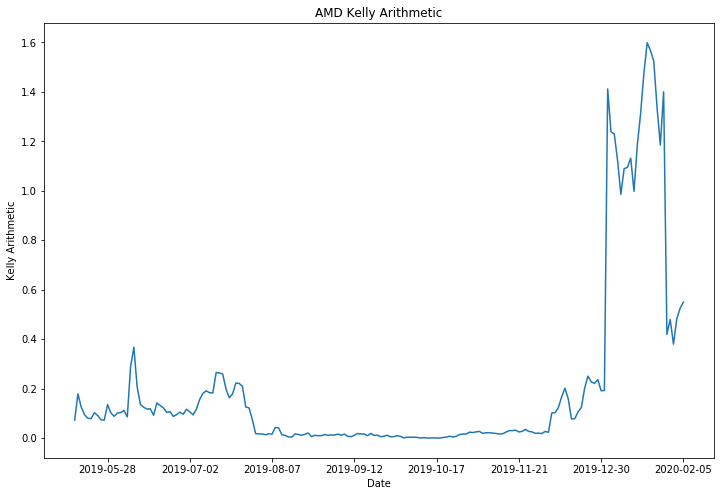

In [6]:
# Compute the running Kelly Arithmetic
running = [kelly_arithmetic(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Kelly Arithmetic up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Kelly Arithmetic')
plt.xlabel('Date')
plt.ylabel('Kelly Arithmetic')

In [7]:
ka = kelly_arithmetic(stocks_returns)
ka

0.020292436157276394

In [8]:
running

[0.07195786408206359,
 0.1786418583151776,
 0.12511125614176008,
 0.0942875772241262,
 0.07981019184978605,
 0.07849674685689145,
 0.10219547968968515,
 0.09131369909193927,
 0.07392377390398866,
 0.07219793396727854,
 0.13536508734634795,
 0.10192384057688521,
 0.08775978061030573,
 0.10096534243710682,
 0.10280690416834098,
 0.11137888757100876,
 0.08561530637159809,
 0.28773286955295724,
 0.3669577569980651,
 0.20646342310957383,
 0.1356927974964329,
 0.1242092299690515,
 0.1172136037952894,
 0.11810675406879179,
 0.09212721725860534,
 0.14197667434172248,
 0.1313127687812458,
 0.12169099077332221,
 0.10361455937133414,
 0.10625771959037278,
 0.08725317016835128,
 0.09485962254910087,
 0.10458545120738069,
 0.09626829738301355,
 0.1165909155851589,
 0.10565962802076696,
 0.09356992839239327,
 0.11646834778755791,
 0.15592467948134217,
 0.18079819518793272,
 0.19102954742452974,
 0.1830432398891349,
 0.1822391820305413,
 0.2644420217113663,
 0.2633563759144365,
 0.2586965554979142,
 

In [9]:
print('Expected Value (Arithmetic): {}%'.format(np.round(kelly_arithmetic(stocks_returns) * 100, 5)))

Expected Value (Arithmetic): 2.02924%
